In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path
from collections import Counter

In [9]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [46]:
#Standard columns for all datasets
columns = [
    "Fishing", "TugTow", "Recreational", "Passenger" , "Cargo", "Tanker", "Other", "Unavailable", "Total"
]

target_fishing = "Fishing"
target_tugtow = "TugTow"
target_rec = "Recreational"
target_passenger = "Passenger"
target_cargo = "Cargo"
target_tanker = "Tanker"
target_other = "Other"
target_unavailable = "Unavailable"
target_total = "Total"

types = [target_fishing, target_tugtow, target_rec, target_passenger, target_cargo, target_tanker, target_other, target_unavailable, target_total]




In [11]:
#df.dtypes

In [57]:
#this will take in the clean data from the SQLite database
#set up engine will take place here first. 

file_path = Path('ml_data_daily_2018.csv')
df = pd.read_csv(file_path, index_col=False)
df.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)

# Drop the null rows
df = df.dropna()
#df.sort_values(by='in', ascending=True)
df['Total'] = df.sum(axis=1)
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = (df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()


df = df.reset_index()
df.head(15)

,index,Date,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
0,0,2018-01-01,9,37,145,44,27,13,12,7,294
1,1,2018-01-02,13,45,119,41,27,14,19,10,288
2,2,2018-01-03,13,44,106,40,36,14,20,11,284
3,3,2018-01-04,15,44,103,45,30,10,15,12,274
4,4,2018-01-05,10,45,107,41,26,13,21,10,273
5,5,2018-01-06,11,43,135,43,26,12,15,10,295
6,6,2018-01-07,15,38,118,37,29,15,13,10,275
7,7,2018-01-08,10,37,103,44,28,15,16,11,264
8,8,2018-01-09,7,41,103,43,24,13,18,11,260
9,9,2018-01-10,7,39,109,48,29,13,21,13,279


In [40]:
# Create our target for fishing model
y = df[target_passenger]
#print(y)
# Create our features
X =  df.drop(["Date", "Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)

In [41]:
X.describe()

,index
count,365.000000
mean,182.000000
std,105.510663
min,0.000000
25%,91.000000
50%,182.000000
75%,273.000000
max,364.000000


In [42]:
#split into training data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape
#print(X_test)

(273, 1)

In [43]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = classifier.predict(X_test)
#print(y_pred)
#print(y_test)
fishing_results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
fishing_results.head(20)

,Prediction,Actual
0,59.170019,52
1,55.900112,78
2,55.551838,55
3,55.706627,62
4,58.396076,48
5,58.628259,38
6,57.312557,55
7,56.345129,64
8,59.073276,46
9,52.417372,43


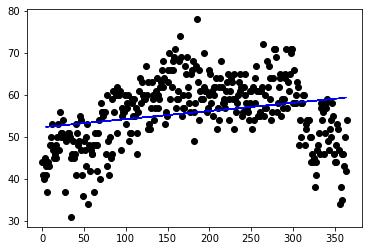

In [45]:
plt.scatter(X,y, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=1)


plt.show()

In [54]:
def ais_graphs():
    for boat_type in types:
        # Create our target for fishing model
        y = df[boat_type]
        # Create our features
        X =  df.drop(["Date", "Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
        X_train.shape
        
        classifier = LinearRegression()
        
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)

        results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

        plt.scatter(X,y, color="black")
        plt.plot(X_test, y_pred, color="blue", linewidth=1)


        plt.show()

        
     

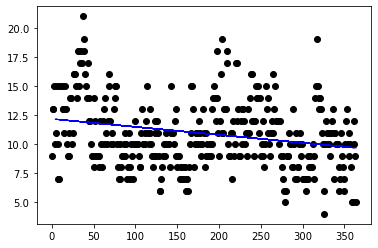

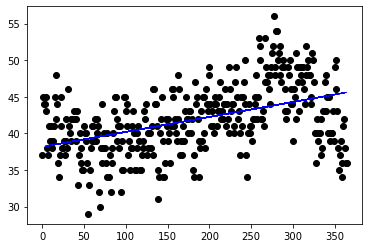

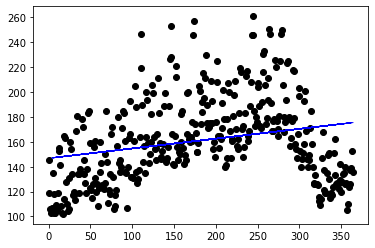

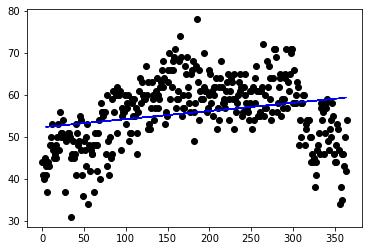

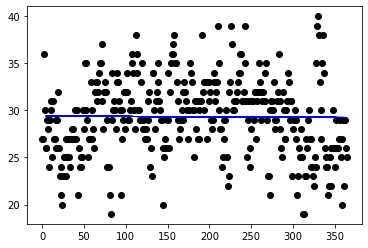

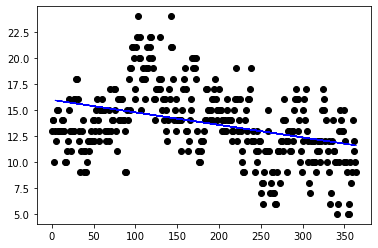

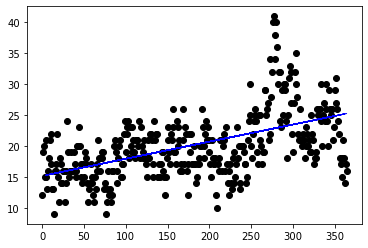

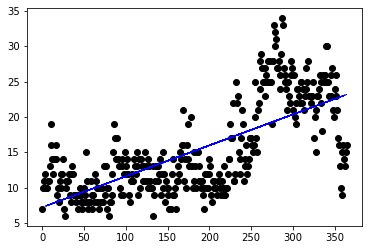

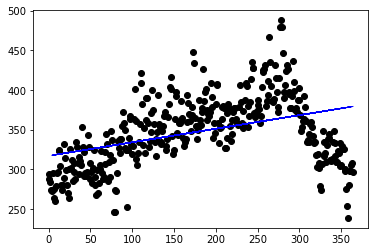

In [55]:
ais_graphs()  